In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2, axis=0)

In [58]:
X = np.linspace(-5, 5, 100)[:, np.newaxis]
W = np.random.randn(1)

X, X.shape, W,  W.shape

(array([[-5.        ],
        [-4.8989899 ],
        [-4.7979798 ],
        [-4.6969697 ],
        [-4.5959596 ],
        [-4.49494949],
        [-4.39393939],
        [-4.29292929],
        [-4.19191919],
        [-4.09090909],
        [-3.98989899],
        [-3.88888889],
        [-3.78787879],
        [-3.68686869],
        [-3.58585859],
        [-3.48484848],
        [-3.38383838],
        [-3.28282828],
        [-3.18181818],
        [-3.08080808],
        [-2.97979798],
        [-2.87878788],
        [-2.77777778],
        [-2.67676768],
        [-2.57575758],
        [-2.47474747],
        [-2.37373737],
        [-2.27272727],
        [-2.17171717],
        [-2.07070707],
        [-1.96969697],
        [-1.86868687],
        [-1.76767677],
        [-1.66666667],
        [-1.56565657],
        [-1.46464646],
        [-1.36363636],
        [-1.26262626],
        [-1.16161616],
        [-1.06060606],
        [-0.95959596],
        [-0.85858586],
        [-0.75757576],
        [-0

In [59]:
target_param = 2
 
Y = X * target_param
Y_hat = np.matmul(X, W)[:, np.newaxis]

Y[:10], Y.shape, Y_hat[:10], Y_hat.shape

(array([[-10.        ],
        [ -9.7979798 ],
        [ -9.5959596 ],
        [ -9.39393939],
        [ -9.19191919],
        [ -8.98989899],
        [ -8.78787879],
        [ -8.58585859],
        [ -8.38383838],
        [ -8.18181818]]),
 (100, 1),
 array([[6.33162811],
        [6.20371643],
        [6.07580476],
        [5.94789308],
        [5.8199814 ],
        [5.69206972],
        [5.56415804],
        [5.43624636],
        [5.30833468],
        [5.180423  ]]),
 (100, 1))

In [43]:
Loss = mean_squared_error(Y, Y_hat)

Loss.shape

(1,)

In [44]:
def derivative_of_loss_respect_weight(y_true, y_pred, X):
    
    N = X.shape[0]  # Number of data points
    
    # Step 1: Compute the difference between true values and predicted values
    diff = y_true - y_pred
    
    # Step 2: Calculate the derivative of Loss with respect to Y_hat
    dLoss_dY_hat = -2/N * diff
    
    # Step 3: Calculate the derivative of Y_hat with respect to W
    dY_hat_dW = X
    
    # Step 4: Multiply the two derivatives to get the derivative of Loss with respect to W
    # print(dY_hat_dW.shape, dLoss_dY_hat.shape)
    dLoss_dW = np.matmul(dY_hat_dW.T, dLoss_dY_hat)
    
    return dLoss_dW

dLoss_dW = derivative_of_loss_respect_weight(Y, Y_hat, X)

print(dLoss_dW.shape)

(1, 1)


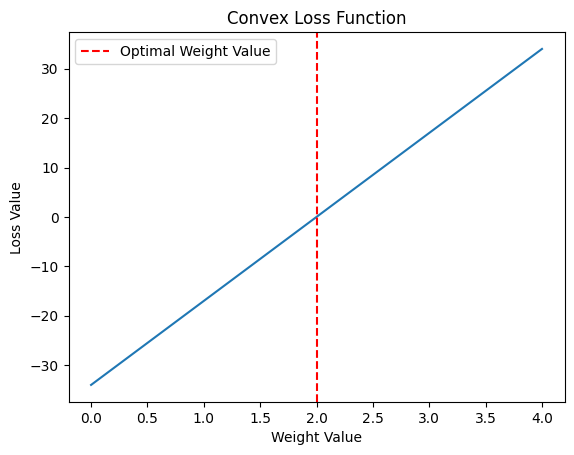

In [111]:
N = 100
min_weight_value = target_param - 2
max_weight_value = target_param + 2

weight_range = np.linspace(min_weight_value, max_weight_value, 100)
predictions = [X * w for w in weight_range]
loss_range = [mean_squared_error(Y, pred) 
              for pred in predictions]

loss_derivative_range = [derivative_of_loss_respect_weight(Y, pred, X)
                for pred in predictions]


# Visualize the convex Loss function centered on the minimum error with the weight value
plt.plot(weight_range, np.array(loss_derivative_range).flatten())
plt.xlabel('Weight Value')
plt.ylabel('Loss Value')
plt.title('Convex Loss Function')
plt.axvline(target_param, color='r', linestyle='--', label='Optimal Weight Value')
plt.legend()
plt.show()


In [118]:

def visualize_derivative_descent(
    max_epochs : int,
    learning_rate : float,
    X : np.array,
    Y : np.array
):
    np.random.seed(42)
    
    target_param = 2
    W = np.random.randn(1)
    
    N = 100
    min_weight_value = target_param - 2
    max_weight_value = target_param + 2

    weight_range = np.linspace(min_weight_value, max_weight_value, 100)
    predictions = [X * w for w in weight_range]
    loss_range = [mean_squared_error(Y, pred) 
                for pred in predictions]
    
    loss_derivative_range = [derivative_of_loss_respect_weight(Y, pred, X)
                for pred in predictions]
    
    # plt.plot(weight_range, np.array(loss_derivative_range).flatten())
    plt.plot(weight_range, loss_range)
    plt.xlabel('Weight Value')
    plt.ylabel('Loss Value')
    # plt.axvline(target_param, color='r', linestyle='--', label='Optimal Weight Value')
    plt.legend()
    
    
    for epoch in range(max_epochs):
        
        prediction = X * W
        loss = mean_squared_error(y_true=Y, y_pred=prediction)
        dLoss_dW = derivative_of_loss_respect_weight(Y, prediction, X)
        W = W - learning_rate * dLoss_dW
        # print(W, loss)
        plt.scatter(x=W, y=loss, c='red', alpha=0.5)
        # print(W)
    
    plt.show()  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


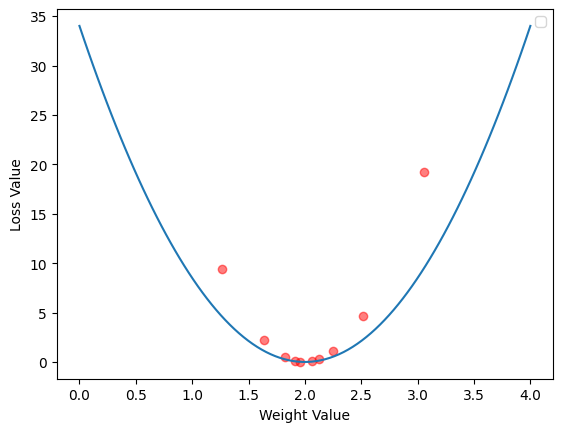

In [119]:
visualize_derivative_descent(
    max_epochs=10,
    learning_rate=0.1,
    X=X,
    Y=Y
)
    
    
    

In [ ]:
def plot_descent(dfx, y, nb):
    # Hyper-parameters
    alpha = 0.5
    max_epochs = 10
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.xlabel("Parameter Value")
    plt.ylabel("Value to Minimize")
    plt.plot(dfx, y)
    plt.scatter(dfx[nb], y[nb], c='green', alpha=0.5)

    
    for _ in range(max_epochs):
        
        print(f"nb : [{nb}]")
        print(f"dfx : [{dfx[nb]}]")
        nb = nb - round(alpha * dfx[nb])
        plt.scatter(dfx[nb], y[nb], c='red', alpha=0.5)
    
    return (dfx[nb])